In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')
from IPython.display import Markdown, display


# Load the dataset from url and store it in a pandas dataframe 

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df = pd.read_csv(url, header=None)


c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def printmd(string):
    display(Markdown(string))

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# change the column names

df = df.rename({0: "age", 
                1: "workclass",
                2: "fnlwgt", 
                3: "education",
                4: "educational-num",
                5: "marital-status",
                6: "occupation",
                7: "relationship",
                8: "race",
                9: "gender",
                10: "capital-gain",
                11: "capital-loss",
                12: "hours-per-week",
                13: "native-country",
                14: "income"}, axis=1)

df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 32561 Columns: 15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# Check for null values
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass          0.0 %
fnlwgt             0.0 %
education          0.0 %
educational-num    0.0 %
marital-status     0.0 %
occupation         0.0 %
relationship       0.0 %
race               0.0 %
gender             0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
native-country     0.0 %
income             0.0 %
dtype: object

In [9]:
# Checking the counts of label categories
income = df['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

 <=50K    75.92 %
 >50K     24.08 %
Name: income, dtype: object

In [10]:
df.age = df.age.astype(float)
df['hours-per-week'] = df['hours-per-week'].astype(float)

## Visualizition of the data 

<Axes: xlabel='income', ylabel='count'>

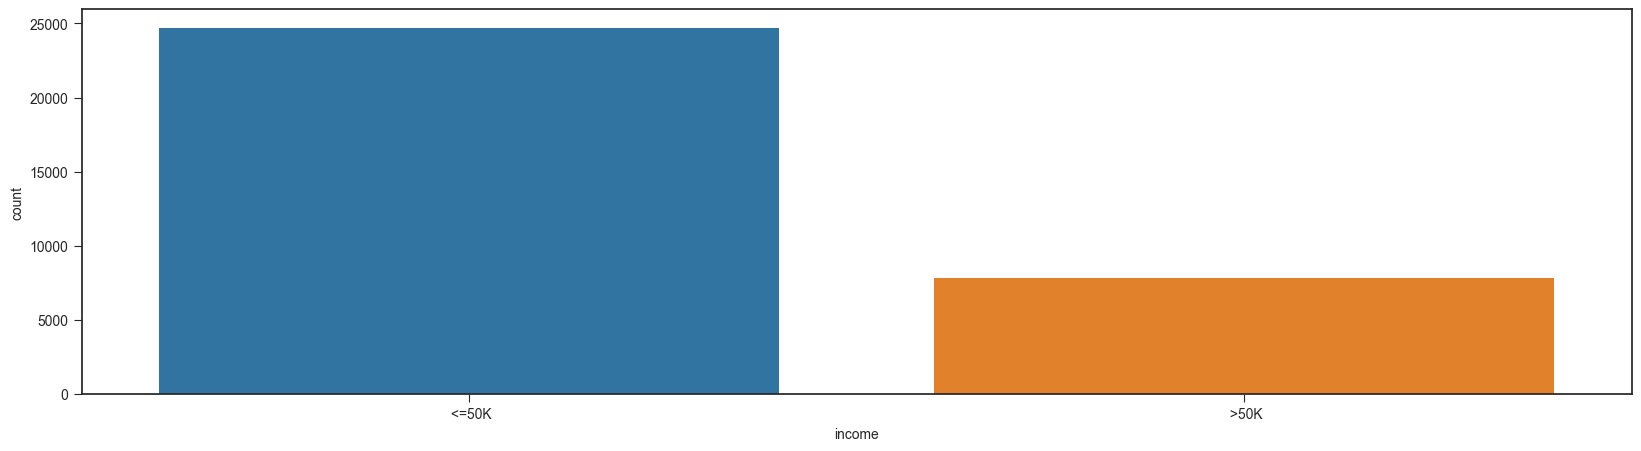

In [11]:
fig = plt.figure(figsize=(20,5))
plt.style.use('seaborn-ticks')
sns.countplot(x='income', data=df)

Text(0, 0.5, 'Count')

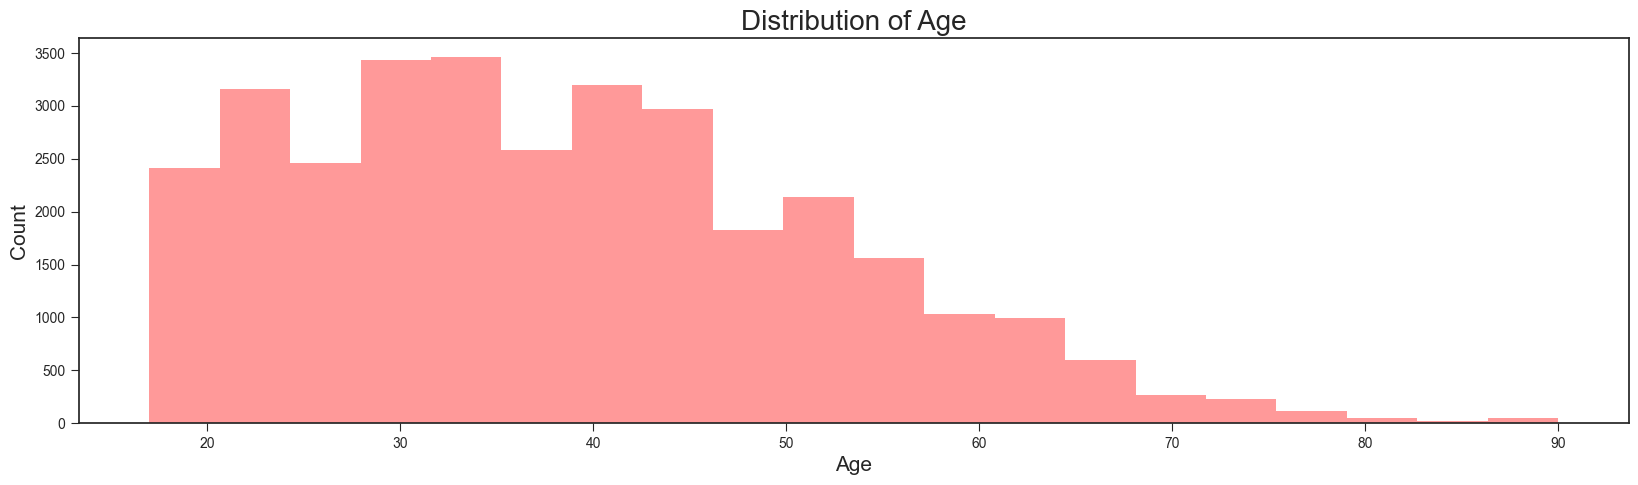

In [12]:
# Plotting the distribution of age 
plt.figure(figsize=(20,5))
sns.distplot(df.age, bins=20, kde=False, color='red')
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Age', fontsize=15)  
plt.ylabel('Count', fontsize=15)

## Correlation Matrix

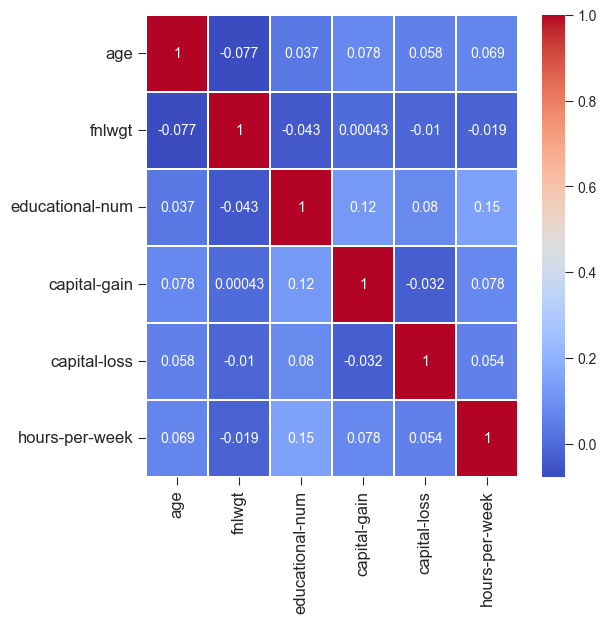

We see that none of the columns are highly correlated.

In [13]:
## correlation matrix 
printmd('## Correlation Matrix')

corr = df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


printmd('We see that none of the columns are highly correlated.')




In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

## Education vs Income

We see from the bar graph below that as the         education level increase, the proportion of people who earn more than 50k a year also         increase. It is interesting to note that only after a master's degree, the proportion of         people earning more than 50k a year, is a majority.

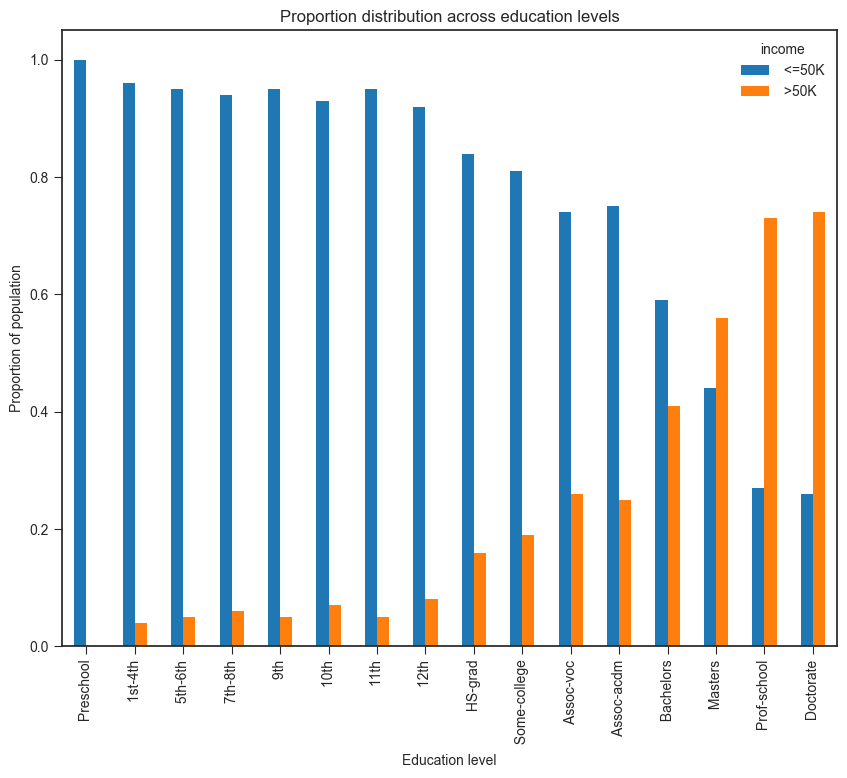

In [15]:
printmd('## Education vs Income') 

edu_level = {}
for x,y in df[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x 

education = round(pd.crosstab(df.education, df.income).div(pd.crosstab(df.education, df.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

printmd('We see from the bar graph below that as the \
        education level increase, the proportion of people who earn more than 50k a year also \
        increase. It is interesting to note that only after a master\'s degree, the proportion of \
        people earning more than 50k a year, is a majority.')


## Gender vs Income

Bar graph showing the proportion of income classes across the genders in figure         below. From the graph, at an overall view, there exists a wage gap between females and males.         Since we do not have the exactly value of the income, we are limited to only observing that the         proportion of males earning more than 50k a year is more than double of their female counterparts.         

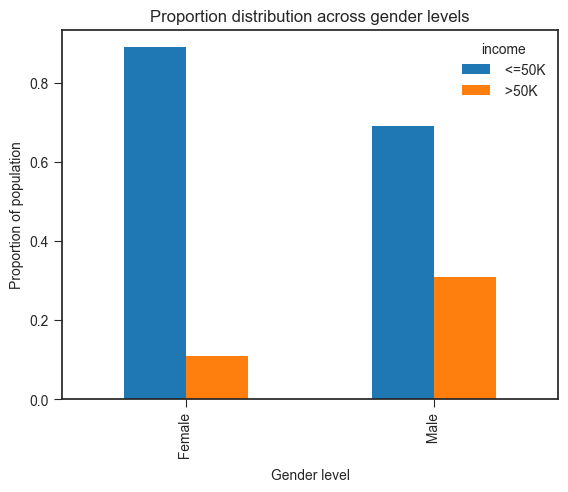

In [16]:
printmd('## Gender vs Income')

gender = round(pd.crosstab(df.gender, df.income).div(pd.crosstab(df.gender, df.income).apply(sum,1),0),2)

ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

printmd('Bar graph showing the proportion of income classes across the genders in figure \
        below. From the graph, at an overall view, there exists a wage gap between females and males. \
        Since we do not have the exactly value of the income, we are limited to only observing that the \
        proportion of males earning more than 50k a year is more than double of their female counterparts. \
        ')

## Occupation vs Income

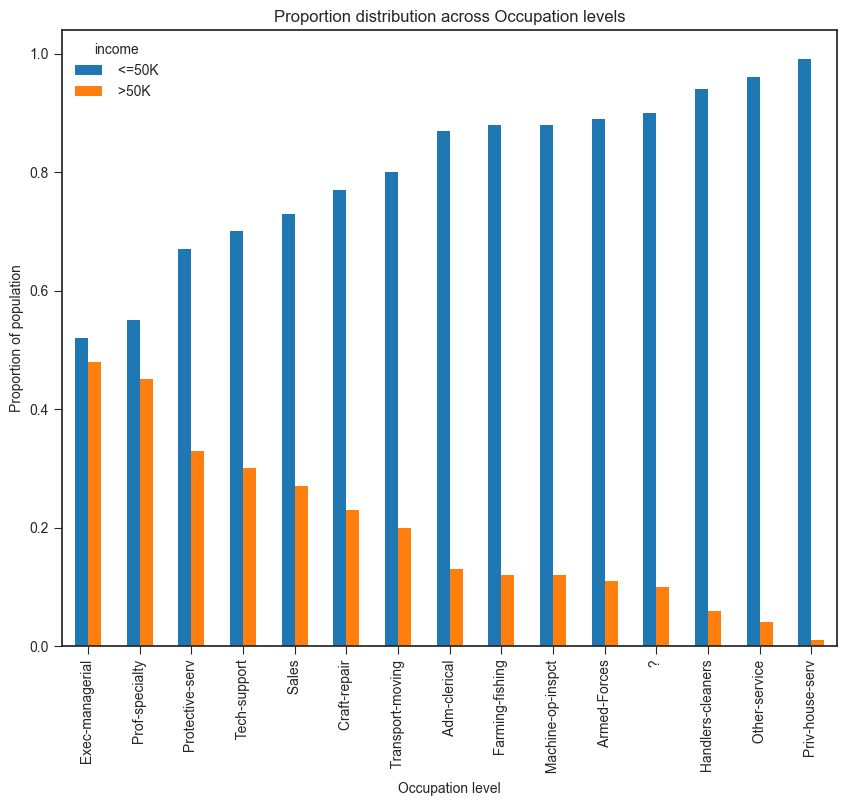

In [17]:
printmd('## Occupation vs Income')

occupation = round(pd.crosstab(df.occupation, df.income).div(pd.crosstab(df.occupation, df.income).apply(sum,1),0),2)
occupation.sort_values(by= ' >50K', ascending=False, inplace=True)
ax = occupation.plot(kind ='bar', title = 'Proportion distribution across Occupation levels', figsize = (10,8))
ax.set_xlabel('Occupation level')
ax.set_ylabel('Proportion of population')

print()

Workclass vs Income

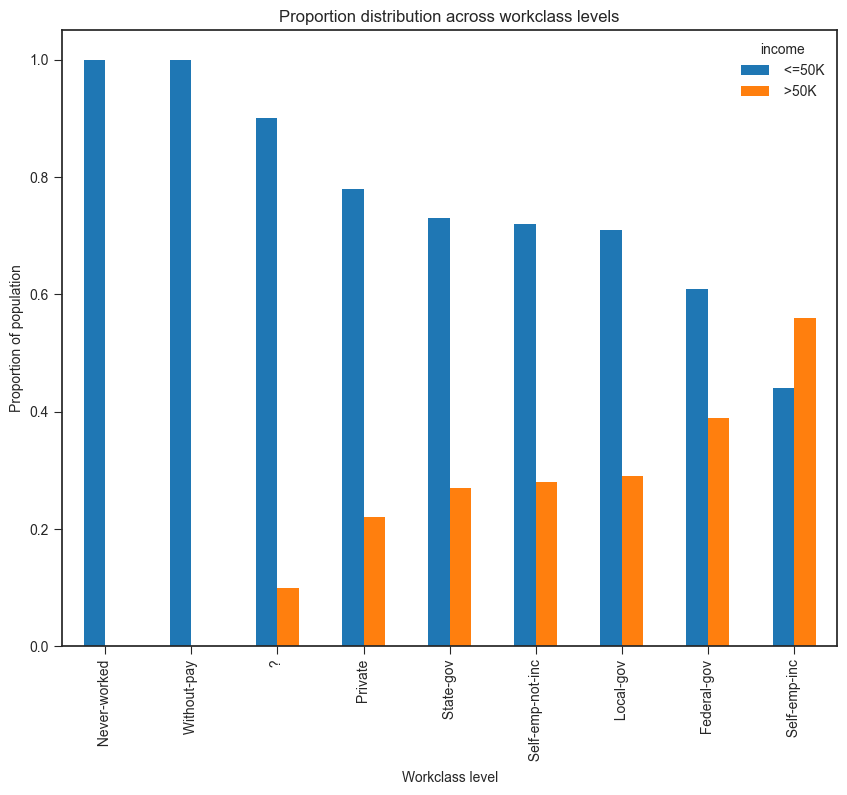

In [18]:
printmd('Workclass vs Income')

workclass = round(pd.crosstab(df.workclass, df.income).div(pd.crosstab(df.workclass, df.income).apply(sum,1),0),2)
workclass.sort_values(by = ' >50K', inplace = True)
ax = workclass.plot(kind ='bar', title = 'Proportion distribution across workclass levels', figsize = (10,8))
ax.set_xlabel('Workclass level')
ax.set_ylabel('Proportion of population')

print()

## Box plot

<Axes: >

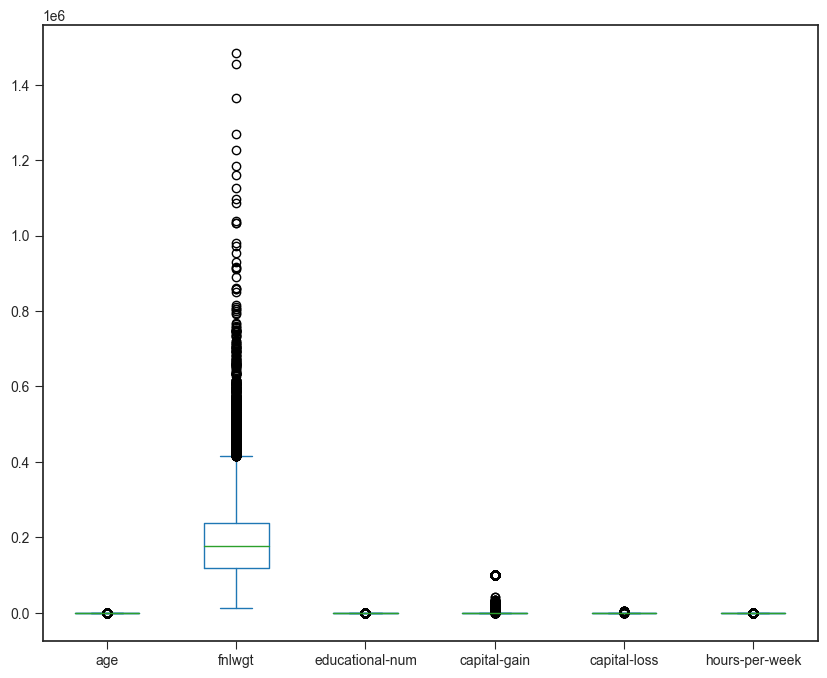

In [19]:
printmd('## Box plot')
df.select_dtypes(exclude = 'category').plot(kind = 'box', figsize = (10,8))

## Data Preparation's

### Normalization 

Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use MinMaxScaler to normalize our dataset. 

### One Hot Encoding 

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [21]:
#label encoding the target variable
df["income"] = df["income"].map({" <=50K": 0, " >50K": 1})

# One hot encoding the categorical variables
le = LabelEncoder()
df = df.apply(le.fit_transform)


# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(df.drop('income', axis=1), df['income'], test_size=0.2, random_state=42)

#normalize the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [22]:
def model_eval(actual, pred):
    
    confusion = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'])
    TP = confusion.iloc[1,1]
    TN = confusion.iloc[0,0]
    FP = confusion.iloc[0,1]
    FN = confusion.iloc[1,0]
    
    accuracy = ((TP+TN))/(TP+FN+FP+TN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    f_measure = (2*recall*precision)/(recall+precision)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    error_rate = 1 - accuracy
    
    out = {}
    out['accuracy'] =  accuracy
    out['precision'] = precision
    out['recall'] = recall
    out['f_measure'] = f_measure
    out['sensitivity'] = sensitivity
    out['specificity'] = specificity
    out['error_rate'] = error_rate

    return out
    

## Model Implementation

In [23]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

### Decision Tree Classifier

For the decision tree classifier, I experimented with the splitting criteria, minimum samples required to split, max depth of the tree, minimum samples required at the leaf level and the maximum features to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.

* Splitting criteria: Gini Index (Using Gini Index marginally outperformed Entropy with a higher accuracy.)
* Min samples required to split: 5% (Best amongst 1%, 10% and 5%.)
* Max Depth: None
* Min samples required at leaf: 0.1 % (Best amongst 1%, 5% and 0.1%.)
* Max features: number of features (Performs better than 'auto', 'log2' and 'sqrt'.)

In [24]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 0.05, min_samples_leaf = 0.001)
clf_gini = clf_gini.fit(X_train, y_train)
clf_gini_pred = clf_gini.predict(X_test)
DTree_Gini = model_eval(y_test, clf_gini_pred)
print('Desicion Tree using Gini Index : %.2f percent.' % (round(DTree_Gini['accuracy']*100,2)))


# Entropy
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 0.05, min_samples_leaf = 0.001)
clf_entropy = clf_entropy.fit(X_train, y_train)
clf_entropy_pred = clf_entropy.predict(X_test)
DTree_Entropy = model_eval(y_test, clf_entropy_pred)
print('Desicion Tree using Entropy : %.2f percent.' % (round(DTree_Entropy['accuracy']*100,2)))


#printmd('### 3.1.2. Model Evaulation ')
ovl_dtree = round(pd.DataFrame([DTree_Entropy, DTree_Gini], index = ['DTree_Entropy','DTree_Gini']),4)
display(ovl_dtree)




Desicion Tree using Gini Index : 84.98 percent.
Desicion Tree using Entropy : 85.17 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
DTree_Entropy,0.8517,0.7873,0.5277,0.6319,0.5277,0.9547,0.1483
DTree_Gini,0.8498,0.8016,0.5016,0.6171,0.5016,0.9605,0.1502


## Support Vector Machine 


For the SVM classifier, I experimented with the various available kernels, the penalty of the error term and the tolerance for stopping criteria. The following values of the parameters attained the best accuracy during classification. Results in the table below.

* Kernel: rbf (Marginally outperformed 'linear, 'poly' and 'sigmoid' kernels.)
* C, penalty of the error term: 1 (Best amongst 0.1, 0.5, 1 and 10)
* Tolerance for stopping criteria: 1e-3 (Best amongst 1e-1, 1e-2, 1e-3, 1e-4 and 1e-5)

In [25]:
# rbf kernal
svm_clf_rbf = SVC(kernel = 'rbf', C = 1, tol = 1e-3)
svm_clf_rbf.fit(X_train, y_train)
svm_clf_rbf_pred = svm_clf_rbf.predict(X_test)
SVM_rbf = model_eval(y_test, svm_clf_rbf_pred)
print('SVM using rbf kernel : %.2f percent.' % (round(SVM_rbf['accuracy']*100,2)))

# Linear kernel
svm_clf_linear = SVC(kernel = 'linear')
svm_clf_linear.fit(X_train, y_train)
svm_clf_linear_pred = svm_clf_linear.predict(X_test)
SVM_linear = model_eval(y_test, svm_clf_linear_pred)
print('SVM using linear kernel : %.2f percent.' % (round(SVM_linear['accuracy']*100,2)))


# Poly kernal
svm_clf_poly = SVC(kernel = 'poly')
svm_clf_poly.fit(X_train, y_train)
svm_clf_poly_pred = svm_clf_poly.predict(X_test)
SVM_poly = model_eval(y_test, svm_clf_poly_pred)
print('SVM using poly kernel : %.2f percent.' % (round(SVM_poly['accuracy']*100,2)))


svm_clf_sigmoid = SVC(kernel = 'sigmoid')
svm_clf_sigmoid.fit(X_train, y_train)
svm_clf_sigmoid_pred = svm_clf_sigmoid.predict(X_test)
SVM_sigmoid = model_eval(y_test, svm_clf_sigmoid_pred)
print('SVM using sigmoid kernel : %.2f percent.' % (round(SVM_sigmoid['accuracy']*100,2)))



ovl_svm = round(pd.DataFrame([SVM_rbf, SVM_linear, SVM_poly, SVM_sigmoid], index = ['SVM_rbf','SVM_linear', 'SVM_poly', 'SVM_sigmoid']),4)
display(ovl_svm)

SVM using rbf kernel : 85.31 percent.
SVM using linear kernel : 80.99 percent.
SVM using poly kernel : 84.95 percent.
SVM using sigmoid kernel : 73.85 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
SVM_rbf,0.8531,0.7756,0.5500,0.6436,0.5500,0.9494,0.1469
SVM_linear,0.8099,0.7573,0.3119,0.4418,0.3119,0.9682,0.1901
SVM_poly,0.8495,0.7817,0.5220,0.6260,0.5220,0.9537,0.1505
SVM_sigmoid,0.7385,0.4577,0.4551,0.4564,0.4551,0.8286,0.2615


## Random Forest
For the random forests classifier, I experimented with the number of trees, splitting criteria, minimum samples required to split, max depth of the tree, minimum samples required at the leaf level and the maximum features to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.

* Num estimators: 100 (Best amongst 10, 50 and 100)
* Splitting criteria: Gini Index (Using Gini Index marginally outperformed Entropy with a higher accuracy.)
* Min samples required to split: 5% (Best amongst 1%, 10% and 5%.)
* Max Depth: None
* Min samples required at leaf: 0.1 % (Best amongst 1%, 5% and 0.1%.)
* Max features: number of features (Performs better than 'auto', 'log2' and 'sqrt'.)

In [26]:
# Gini
r_forest_gini = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_gini.fit(X_train, y_train)
r_forest_gini_pred = r_forest_gini.predict(X_test)
rforest_gini = model_eval(y_test, r_forest_gini_pred)
print('Random Forest using Gini Index : %.2f percent.' % (round(rforest_gini['accuracy']*100,2)))

# Entropy
r_forest_entropy = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_features = None,  min_samples_split = 0.05, min_samples_leaf = 0.001)
r_forest_entropy.fit(X_train, y_train)
r_forest_entropy_pred = r_forest_entropy.predict(X_test)
rforest_entropy = model_eval(y_test, r_forest_entropy_pred)
print('Random Forest using Entropy : %.2f percent.' % (round(rforest_entropy['accuracy']*100,2)))

#printmd('### 3.4.1.2. Model Evaulation ')
ovl_rf = round(pd.DataFrame([rforest_gini, rforest_entropy], index = ['rforest_gini','rforest_entropy']),4)
display(ovl_rf)

Random Forest using Gini Index : 84.91 percent.
Random Forest using Entropy : 84.83 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
rforest_gini,0.8491,0.8050,0.4940,0.6122,0.4940,0.9620,0.1509
rforest_entropy,0.8483,0.8091,0.4857,0.6070,0.4857,0.9636,0.1517


## Adaboost

For the adaboost classifier, I experimented with base estimator from which the boosted ensemble is built and number of estimators. The following values of the parameters attained the best accuracy during classification. Results in the table below.

* Base Estimator: DecisionTreeClassifier
* Num estimators: 100 (Best amongst 10, 50 and 100.)

In [27]:
ada = AdaBoostClassifier(n_estimators=100)                     
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
adaboost = model_eval(y_test, ada_pred)
print('Adaboost : %.2f percent.' % (round(adaboost['accuracy']*100,2)))

#printmd('### 3.4.2.2. Model Evaulation ')
ovl_ada = round(pd.DataFrame([adaboost], index = ['adaboost']),4)
display(ovl_ada)

Adaboost : 86.92 percent.


,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
adaboost,0.8692,0.7855,0.6295,0.6989,0.6295,0.9454,0.1308


## Gradient Boosting 



In [28]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gradient_boosting.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting.predict(X_test)
gradient_boosting_oval = model_eval(y_test, gradient_boosting_pred)
ovl_gb = round(pd.DataFrame([gradient_boosting_oval], index = ['gradient_boosting_oval']),4)
print('Gradient Boosting : %.2f percent.' % (round(gradient_boosting_oval['accuracy']*100,2)))



Gradient Boosting : 86.78 percent.


In [29]:
# Grid Search for best parameters 
# param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5], 'max_depth': [1, 2, 3, 4, 5]}
# grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# print('Best parameters : ', grid_search.best_params_)
# print('Best score : ', grid_search.best_score_)
# print('Best estimator : ', grid_search.best_estimator_)


## Logistic Regression 

In [30]:
log_reg = LogisticRegression(penalty = 'l2', dual = False, tol = 1e-4, fit_intercept = True, 
                            solver = 'liblinear')
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
logistic_reg = model_eval(y_test, log_reg_pred)
ovl_lr = round(pd.DataFrame([logistic_reg], index = ['logistic_reg']),4)
print('Logistic Regression : %.2f percent.' % (round(logistic_reg['accuracy']*100,3))) 

Logistic Regression : 82.39 percent.


## k Nearest Neighbours

For the K nearest neighbours classifier, I experimented with the num of neighbours values, every odd number ranging from 1 to 50

In [31]:
# from sklearn.neighbors import KNeighborsClassifier
# knn_outs = []
# for i in range(1,50,2):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train, y_train)
#     knn_pred = knn.predict(X_test)
#     knn_perf = model_eval(y_test, knn_pred)
#     knn_perf['k'] = i
#     knn_outs.append(knn_perf)

# best_k = max(knn_outs, key=lambda x:x['accuracy']) 
# print('Best KNN model with k = %d and accuracy = %.2f percent.' % (best_k['k'], round(best_k['accuracy']*100,2)))
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


ovl_knn = round(pd.DataFrame([model_eval(y_test, knn_pred)], index = ['knn']),4)
display(ovl_knn)

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
knn,0.8501,0.7139,0.6321,0.6705,0.6321,0.9195,0.1499


## Model Evaluation

In [32]:
overall_eval = pd.concat([ovl_dtree, ovl_svm, ovl_rf, ovl_ada, ovl_gb, ovl_lr], axis = 0)
overall_eval.sort_values(by = ['f_measure', 'accuracy'], ascending = False, inplace = True)

display(overall_eval)

,accuracy,precision,recall,f_measure,sensitivity,specificity,error_rate
adaboost,0.8692,0.7855,0.6295,0.6989,0.6295,0.9454,0.1308
gradient_boosting_oval,0.8678,0.7817,0.6270,0.6959,0.6270,0.9444,0.1322
SVM_rbf,0.8531,0.7756,0.5500,0.6436,0.5500,0.9494,0.1469
DTree_Entropy,0.8517,0.7873,0.5277,0.6319,0.5277,0.9547,0.1483
SVM_poly,0.8495,0.7817,0.5220,0.6260,0.5220,0.9537,0.1505
DTree_Gini,0.8498,0.8016,0.5016,0.6171,0.5016,0.9605,0.1502
rforest_gini,0.8491,0.8050,0.4940,0.6122,0.4940,0.9620,0.1509
rforest_entropy,0.8483,0.8091,0.4857,0.6070,0.4857,0.9636,0.1517
logistic_reg,0.8239,0.7066,0.4615,0.5583,0.4615,0.9391,0.1761
SVM_sigmoid,0.7385,0.4577,0.4551,0.4564,0.4551,0.8286,0.2615


In [33]:
def generateRoc(test_data, test_label, classifiers, pred_labels, plot_labels, limiter):
    
    color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    
    y_test = label_binarize(test_label, classes=[0, 1])
    plt.figure()
    
    for i in range(len(classifiers)):
        
        if plot_labels[i] not in limiter:
            continue
        
        y_score = classifiers[i].predict_proba(test_data)
        pos_class_index = list(np.unique(pred_labels[i])).index(1)
        
        fpr, tpr, thres = roc_curve(y_test.ravel(),y_score[:,pos_class_index], pos_label=1)
                               
        lw = 2
        plt.plot(fpr, tpr, color=color[i % len(color)],lw=lw, label=plot_labels[i])
        
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

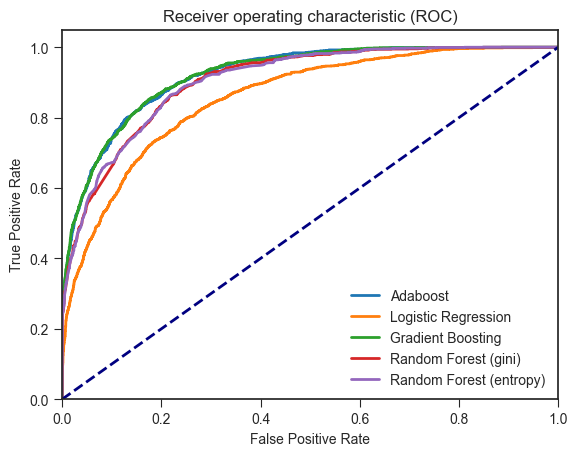

In [34]:
limiter = ['Adaboost' , 'Logistic Regression', 'Gradient Boosting', 'Random Forest (gini)', 'Random Forest (entropy)']
classifier = [ada, log_reg, gradient_boosting, r_forest_gini, r_forest_entropy]
pred_labels = [ada_pred, log_reg_pred, gradient_boosting_pred, r_forest_gini_pred, r_forest_entropy_pred]
plot_labels = ['Adaboost' , 'Logistic Regression', 'Gradient Boosting', 'Random Forest (gini)', 'Random Forest (entropy)']
generateRoc(X_test, y_test, classifier, pred_labels, plot_labels, limiter)

In [35]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [36]:
from FCG.Generators import CFKnn

In [40]:
config = {"features_to_change": ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']}

X_test = pd.DataFrame(X_test, columns = df.drop('income', axis = 1).columns)

In [41]:
cfknn = CFKnn(df, log_reg, config, 1)
counter_factuals = cfknn.generate_mulitple_counterfactuals_parallel(X_test)
print(f"Generated {len(counter_factuals)} counterfactuals")

Generated 5487 counterfactuals
